In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.constants import golden 
import scipy.stats as st
import statsmodels.api as sm
import numpy as np

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize = (5.0, 5.0/golden)) 

ca = pd.read_csv('ComposizioneAcqua.csv', sep = ',', decimal=".", parse_dates=True)
ca

,NomeSorgente,Oro,DurezzaAcqua
0,Sorgente1,0,21.201381
1,Sorgente1,0,25.294662
2,Sorgente1,4,12.435279
3,Sorgente1,3,16.146828
4,Sorgente1,0,21.091517
...,...,...,...
1645,Sorgente5,4,5.601863
1646,Sorgente5,4,6.642368
1647,Sorgente5,6,3.134170
1648,Sorgente5,2,12.190175


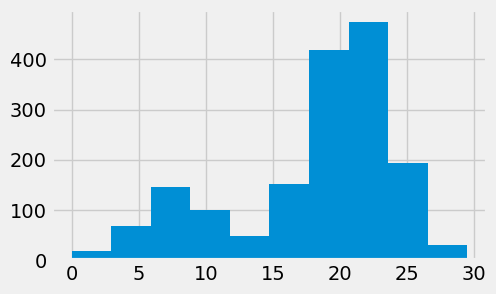

In [2]:
#3.1 Tracciare un grafico opportuno per visualizzare la distribuzione della durezza dell'acqua
ca['DurezzaAcqua'].hist()
plt.show()

Il grafico precedente mostra come vi siano due punti di massimo locale, mentre il modello normale ha una forma a campana. Possiamo quindi dire che i dati non seguono una legge normale.


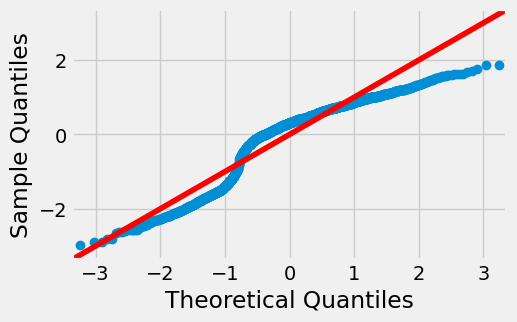

In [6]:
#3.2 La distribuzione delle frequenze osservate è compatibile con un modello normale ?
print('Il grafico precedente mostra come vi siano due punti di massimo locale, mentre il modello normale ha una forma a campana. Possiamo quindi dire che i dati non seguono una legge normale.')
sm.qqplot(ca['DurezzaAcqua'], fit = True, line = '45')
plt.show()

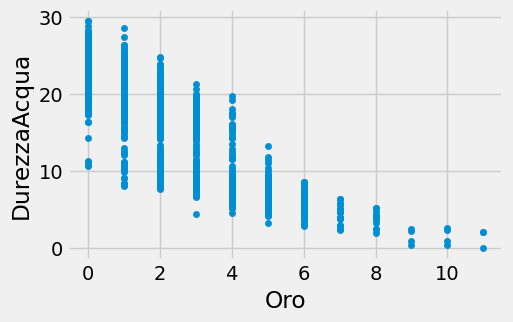

Il grafico di dispersione e l indice di correlazione negativo confermano come vi sia una relazione inversa tra quantità di oro e durezza acqua


In [10]:
'''
3.3 L'ufficio analisi crede che ci sia una relazione tra quantità d'oro e durezza acqua: usate un 
indice numerico e un grafico per motivare la risposta.
'''
ca.plot.scatter('Oro', 'DurezzaAcqua')
plt.show()
ca['Oro'].corr(ca['DurezzaAcqua'])
print('Il grafico di dispersione e l indice di correlazione negativo confermano come vi sia una relazione inversa tra quantità di oro e durezza acqua')

In [11]:
#3.4 Che tipo di relazione riscontrate ?
print('relazione inversa')

relazione inversa


In [13]:
'''
3.5 Osservando i due grafici prodotti nei primi due punti, i chimici sospettano che non tutte le sorgenti
abbiano la stessa durezza media dell'acquam e che nel dataset vi siano due gruppi distinti sotto questo punto
di vista. Questa ipotesi è condivisibile ?
'''
print('si perchè l istogramma si può vedere come sovrapposizione di due campane.')

si perchè l istogramma si può vedere come sovrapposizione di due campane.


In [14]:
#3.6 Durezza media dell'acqua per ogni sorgente
ca.groupby('NomeSorgente').mean()

,Oro,DurezzaAcqua
NomeSorgente,,
Sorgente1,0.970000,21.009675
Sorgente2,1.048000,20.836725
Sorgente3,1.120000,20.696062
Sorgente4,1.068000,20.917371
Sorgente5,4.228571,7.754144


In [23]:
'''
3.7 Dal punto precedente dovrebbe essere emerso che la sorgente 5 presenta una durezza dell'acqua 
nettamente inferiore a quella delle altre sorgenti, le quali invece hanno una durezza media abbastanza 
simile. Selezionate e memorizzate nella variabile sorgente_5 gli attributi Oro e DurezzaAcqua soltanto 
della sorgente 5; selezionate e memorizzate nella variabile altre_sorgenti i medesimi attributi per 
tutte le altre sorgenti.
'''
sorgente_5 = ca[ca['NomeSorgente'] == 'Sorgente5']
altre_sorgenti = ca[ca['NomeSorgente'] != 'Sorgente5']

,NomeSorgente,Oro,DurezzaAcqua
0,Sorgente1,0,21.201381
1,Sorgente1,0,25.294662
2,Sorgente1,4,12.435279
3,Sorgente1,3,16.146828
4,Sorgente1,0,21.091517
...,...,...,...
1295,Sorgente4,2,16.587424
1296,Sorgente4,0,22.519519
1297,Sorgente4,4,15.428171
1298,Sorgente4,0,27.437145


In [24]:
#3.8 Stimare il valore atteso del numero di particelle d'oro nella sorgente 5 e in tutte le altre
print(sorgente_5.Oro.mean(), altre_sorgenti.Oro.mean())

4.228571428571429 1.0476923076923077


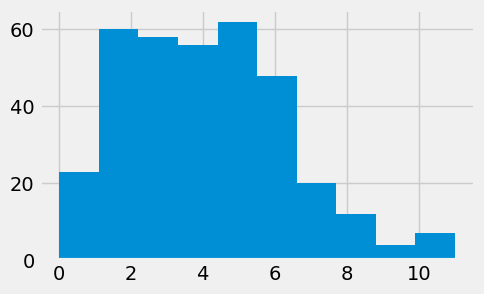

Andamento unimodale è compatibile col modello di Poisson. Inoltre, stimando media e varianza:
4.228571428571429 4.38886614817847
si ottengono valori molto simili tra loro.


In [29]:
#3.9 La distribuzione delle frequenze osservate per sorgente 5 è compatibile con un modello di Poisson ?
sorgente_5.Oro.hist()
plt.show()
print('Andamento unimodale è compatibile col modello di Poisson. Inoltre, stimando media e varianza:')
print(sorgente_5.Oro.mean(), sorgente_5.Oro.var())
print('si ottengono valori molto simili tra loro.')

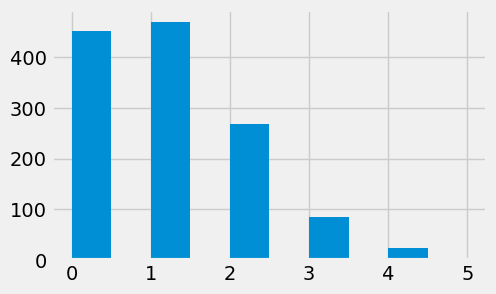

Andamento unimodale suggerisce un modello di Poisson. Inoltre, stimando media e varianza:
1.0476923076923077 0.9923349321963675
si ottengono valori molto simili tra loro.


In [31]:
#3.10 La distribuzione delle frequenze osservate per le altre sorgenti è compatibile con un modello di Poisson ?
altre_sorgenti.Oro.hist()
plt.show()
print('Andamento unimodale suggerisce un modello di Poisson. Inoltre, stimando media e varianza:')
print(altre_sorgenti.Oro.mean(), altre_sorgenti.Oro.var())
print('si ottengono valori molto simili tra loro.')

In [37]:
'''
3.11 Durante l'attività di filtraggio dalla sorgente 5, una particella di oro ha inceppato il dispositivo 
di filtraggio dell'acqua. Si calcoli la probabilità di non trovare altre particelle di oro nei prossimi 
10 litri di acqua, dopo aver sbloccato il dispositivo.
'''
l_s = sorgente_5.Oro.mean()/5
l_s


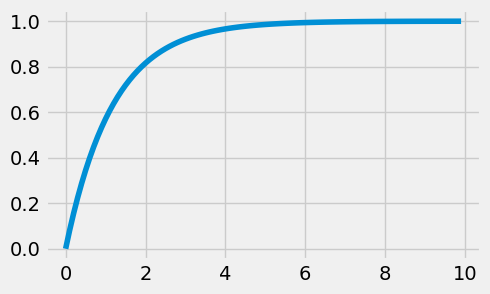

In [38]:
'''
3.12 Si tracci il grafico della funzione di ripartizione della variabile casuale Y = "quantità di acqua 
da analizzare (espressa in litri) prima di incontrare la prossima particella di oro":
    nel caso della sorgente 5;
    per tutte le altre sorgenti.
'''
T_5 = st.expon(scale = 1/l_s)
t = np.arange(0,10, .1)
plt.plot(t, T_5.cdf(t))
plt.show()